In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:

(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:

def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

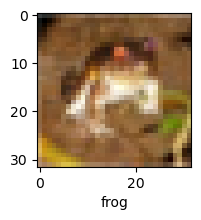

In [10]:
plot_sample(X_train, y_train, 0)


Normalizing the training data

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [13]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=10)

D:\Installation_path\ANACONDA\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.3040 - loss: 1.9345
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.4225 - loss: 1.6428
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.4531 - loss: 1.5579
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.4767 - loss: 1.4919
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.4977 - loss: 1.4300
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.5074 - loss: 1.3931
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.5273 - loss: 1.3477
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.5405 - loss: 1.3160
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.5472 - loss: 1.2910
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.5607 - loss: 1.2527


In [27]:

from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.47      0.66      0.55      1000
           1       0.77      0.49      0.60      1000
           2       0.38      0.50      0.43      1000
           3       0.39      0.11      0.17      1000
           4       0.47      0.38      0.42      1000
           5       0.34      0.59      0.43      1000
           6       0.47      0.70      0.57      1000
           7       0.77      0.36      0.49      1000
           8       0.63      0.64      0.64      1000
           9       0.62      0.55      0.58      1000

    accuracy                           0.50     10000
   macro avg       0.53      0.50      0.49     10000
weighted avg       0.53      0.50      0.49     10000




Now let us build a convolutional neural network to train our images

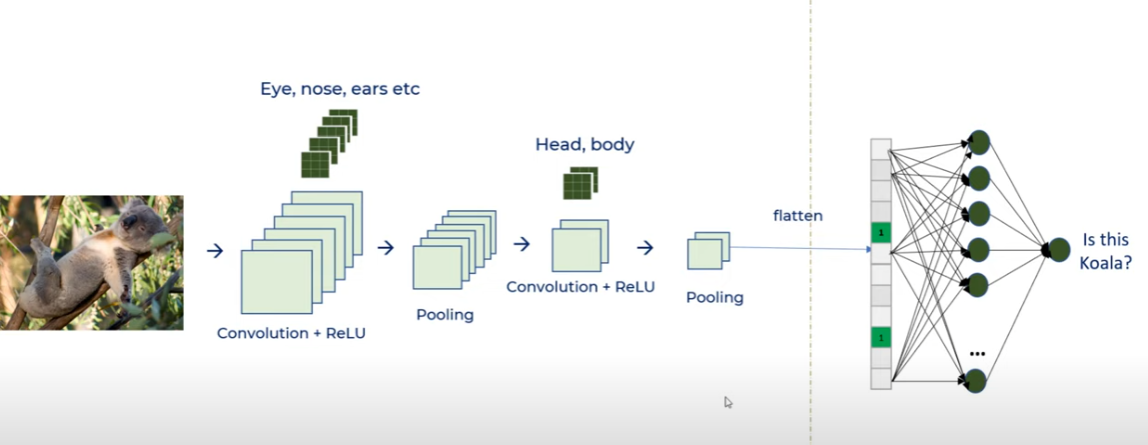

In [30]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

D:\Installation_path\ANACONDA\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3906 - loss: 1.6788
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6070 - loss: 1.1200
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6574 - loss: 0.9790
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6897 - loss: 0.8890
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7183 - loss: 0.8126
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7372 - loss: 0.7512
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7609 - loss: 0.6945
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7755 - loss: 0.6479
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7923 - loss: 0.6002
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8082 - loss: 0.5507


**With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features**

In [37]:
cnn.evaluate(X_test,y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7087 - loss: 0.9084


[0.9138461947441101, 0.7024999856948853]

In [39]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[2.8188131e-04, 7.5570933e-05, 6.4624818e-03, 4.8693973e-01,
        1.5771153e-04, 4.9328730e-01, 9.6186303e-04, 1.7713782e-04,
        1.1654247e-02, 2.0895932e-06],
       [1.1374401e-02, 2.6023487e-02, 4.5550893e-05, 4.0656601e-06,
        1.8476042e-07, 3.0375569e-09, 4.2000540e-08, 8.3884828e-09,
        9.6247679e-01, 7.5540622e-05],
       [3.2545950e-02, 2.9767254e-01, 1.7364853e-03, 3.8550252e-03,
        6.3782622e-04, 6.9888245e-04, 1.1190009e-04, 2.6199821e-04,
        6.3749391e-01, 2.4985461e-02],
       [9.0923595e-01, 9.1439411e-05, 5.4770435e-04, 1.3956967e-05,
        2.4197747e-03, 7.8392759e-07, 4.0743871e-06, 1.0002591e-07,
        8.7669529e-02, 1.6617389e-05],
       [1.1347132e-06, 3.7853344e-05, 2.0014873e-02, 1.1069175e-02,
        1.4738780e-01, 1.3382051e-03, 8.2013524e-01, 6.1561836e-06,
        9.2962882e-06, 1.7848095e-07]], dtype=float32)

In [41]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[5, 8, 8, 0, 6]

In [43]:

y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

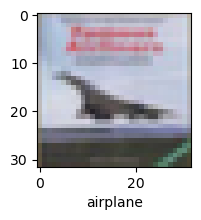

In [45]:
plot_sample(X_test, y_test,3)

In [47]:
classes[y_classes[3]]

'airplane'

In [49]:

classes[y_classes[3]]

'airplane'